In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

In [2]:
import mne
from mne.datasets import sample
from mne.time_frequency import csd_fourier, csd_multitaper, csd_morlet

In [3]:
import os

In [4]:
path="/run/user/1001/gvfs/dav:host=amubox.univ-amu.fr,ssl=true,prefix=%2Fremote.php%2Fdav/files/dauce.e/Shared/JSON Files Distance Project/"

In [5]:
dist_files = os.listdir(path)
f_list_tot = []
for fname in dist_files:
    f_list_tot.append(fname[:-5])
f_list_tot

['Alt_22112017_T_S1_30_replay-01',
 'Alt_22112017_T_S1_60_replay-01',
 'Alt_22112017_T_S1_90_replay-01',
 'Alt_22112017_T_S2_30_replay-01',
 'Alt_22112017_T_S2_60_replay-01',
 'Alt_22112017_T_S2_90_replay-01',
 'Alt_24112017_T_S1_30_replay-02',
 'Alt_24112017_T_S1_60_replay-01',
 'Alt_24112017_T_S1_90_replay-02',
 'Alt_24112017_T_S2_30_replay-02',
 'Alt_24112017_T_S2_60_replay-02',
 'Alt_24112017_T_S2_90_replay-01',
 'Alt_27112017_T_S1_30_replay-01',
 'Alt_27112017_T_S1_60_replay-02',
 'Alt_27112017_T_S1_90_replay-01',
 'Alt_27112017_T_S2_30_replay-01',
 'Alt_27112017_T_S2_60_replay-01',
 'Alt_27112017_T_S2_90_replay-01',
 'Alt_28112017_T_S1_30_replay-01',
 'Alt_28112017_T_S1_60_replay-01',
 'Alt_28112017_T_S1_90_replay-01',
 'Alt_28112017_T_S2_60_replay-01',
 'Arc_01022018_T_S1_60_replay-01',
 'Arc_01022018_T_S2_30_replay-04',
 'Arc_01022018_T_S2_90_replay-01',
 'Arc_02022018_T_S1_60_replay-01',
 'Arc_02022018_T_S1_90_replay-01',
 'Arc_02022018_T_S2_60_replay-01',
 'Arc_02022018_T_S2_

In [6]:
valid_trials=[]
with open('File 10 Trials.csv') as f:
    for line in f:
        valid_trials.append(line[:-1])
len(f_list_tot), len(valid_trials)
valid_trials

['Alt_16112017_T_S1_30_replay-01',
 'Alt_22112017_T_S1_30_replay-01',
 'Alt_27112017_T_S1_30_replay-01',
 'Alt_28112017_T_S1_30_replay-01',
 'Arc_01022018_T_S1_30_replay-04',
 'Arc_01122017_T_S1_30_replay-02',
 'Arc_02022018_T_S1_30_replay-02',
 'Arc_13022018_T_S1_30_replay-01',
 'Arc_13122017_T_S1_30_replay-01',
 'Arc_14022018_T_S1_30_replay-01',
 'Arc_16022018_T_S1_30_replay-03',
 'Arc_20022018_T_S1_30_replay-02',
 'Arc_22012018_T_S1_30_replay-01',
 'Arc_22022018_T_S1_30_replay-01',
 'Arc_25012018_T_S1_30_replay-01',
 'Arc_26022018_T_S1_30_replay-02',
 'Arc_27112017_T_S1_30_replay-02',
 'Arc_28112017_T_S1_30_replay-01',
 'Pro_01022018_T_S1_30_replay-03',
 'Pro_04122017_T_S1_30_replay-02',
 'Pro_05122017_T_S1_30_replay-02',
 'Pro_09012018_T_S1_30_replay-01',
 'Pro_11012018_T_S1_30_replay-01',
 'Pro_11122017_T_S1_30_replay-01',
 'Pro_12012018_T_S1_30_replay-01',
 'Pro_13022018_T_S1_30_replay-02',
 'Pro_13122017_T_S1_30_replay-02',
 'Pro_15122017_T_S1_30_replay-01',
 'Pro_17012018_T_S1_

In [7]:
for i, fname in enumerate(f_list_tot):
    if fname in valid_trials:
        print(i, fname)
n_figs = i

0 Alt_22112017_T_S1_30_replay-01
1 Alt_22112017_T_S1_60_replay-01
4 Alt_22112017_T_S2_60_replay-01
7 Alt_24112017_T_S1_60_replay-01
12 Alt_27112017_T_S1_30_replay-01
18 Alt_28112017_T_S1_30_replay-01
22 Arc_01022018_T_S1_60_replay-01
23 Arc_01022018_T_S2_30_replay-04
27 Arc_02022018_T_S2_60_replay-01
29 Arc_20022018_T_S2_90_replay-01
31 Pro_01022018_T_S2_90_replay-01
32 Pro_04122017_T_S2_60_replay-01
33 Pro_04122017_T_S2_90_replay-01
34 Pro_05122017_T_S1_30_replay-02
35 Pro_05122017_T_S1_60_replay-02
36 Pro_05122017_T_S2_30_replay-02
37 Pro_05122017_T_S2_60_replay-01
38 Pro_05122017_T_S2_90_replay-01
39 Pro_09012018_T_S1_30_replay-01
40 Pro_09012018_T_S1_90_replay-01
41 Pro_09012018_T_S2_30_replay-01
42 Pro_11012018_T_S1_60_replay-01
44 Pro_11122017_T_S1_90_replay-02
45 Pro_11122017_T_S2_30_replay-01
46 Pro_11122017_T_S2_90_replay-03
47 Pro_12012018_T_S1_90_replay-02
48 Pro_12012018_T_S2_30_replay-01
50 Pro_13122017_T_S1_90_replay-04
51 Pro_13122017_T_S2_30_replay-01
52 Pro_15122017_T_

In [8]:
f_list = f_list_tot
f_list

['Alt_22112017_T_S1_30_replay-01',
 'Alt_22112017_T_S1_60_replay-01',
 'Alt_22112017_T_S1_90_replay-01',
 'Alt_22112017_T_S2_30_replay-01',
 'Alt_22112017_T_S2_60_replay-01',
 'Alt_22112017_T_S2_90_replay-01',
 'Alt_24112017_T_S1_30_replay-02',
 'Alt_24112017_T_S1_60_replay-01',
 'Alt_24112017_T_S1_90_replay-02',
 'Alt_24112017_T_S2_30_replay-02',
 'Alt_24112017_T_S2_60_replay-02',
 'Alt_24112017_T_S2_90_replay-01',
 'Alt_27112017_T_S1_30_replay-01',
 'Alt_27112017_T_S1_60_replay-02',
 'Alt_27112017_T_S1_90_replay-01',
 'Alt_27112017_T_S2_30_replay-01',
 'Alt_27112017_T_S2_60_replay-01',
 'Alt_27112017_T_S2_90_replay-01',
 'Alt_28112017_T_S1_30_replay-01',
 'Alt_28112017_T_S1_60_replay-01',
 'Alt_28112017_T_S1_90_replay-01',
 'Alt_28112017_T_S2_60_replay-01',
 'Arc_01022018_T_S1_60_replay-01',
 'Arc_01022018_T_S2_30_replay-04',
 'Arc_01022018_T_S2_90_replay-01',
 'Arc_02022018_T_S1_60_replay-01',
 'Arc_02022018_T_S1_90_replay-01',
 'Arc_02022018_T_S2_60_replay-01',
 'Arc_02022018_T_S2_

In [9]:
def session_keys(fname):
    return (fname[:3], fname[8:12]+fname[6:8]+fname[4:6], fname[18:20], fname[15:17])

In [10]:
def calc_turn_indices(pos_signal):
    
    FREQ_INF = .1
    FREQ_SUP = .2
    srate = 25
    
    filtered_pos_signal = mne.filter.filter_data(pos_signal, srate, FREQ_INF, FREQ_SUP)
    
    speed_signal = np.diff(filtered_pos_signal)
    filtered_signal = speed_signal
    #filtered_signal = mne.filter.filter_data(speed_signal, srate, FREQ_INF, FREQ_SUP)
    
    q1 = np.quantile(filtered_signal, .9)
    q2 = np.quantile(filtered_signal, .1)

    turn_indices = []
    i = 0
    n_obs = len(filtered_signal)
    while i < n_obs:
        if filtered_signal[i] > q1 and (30 <= pos_signal[i] <= 150):
            delta_i_max = min(100, n_obs - i)
            #print(i, delta_i_max)
            for delta_i in range(10, delta_i_max):
                if filtered_signal[i+delta_i] < q2 and (30 <= pos_signal[i] <= 150) :
                    i_max = i+delta_i
                    delta_i_turn = np.argmax(filtered_pos_signal[i:i+delta_i]) 
                    turn_indices.append(i+delta_i_turn)
                    i = i + max(delta_i_turn, srate) #delta_i_max
                    break
            i = i + srate  # 1 second
        else:
            i = i + 1

    return turn_indices, speed_signal                   

loading Alt_22112017_T_S1_30_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 825 samples (33.000 sec)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: RuntimeWarning: invalid value encountered in double_scalars


loading Alt_22112017_T_S1_60_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 825 samples (33.000 sec)

loading Alt_22112017_T_S2_60_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.2

- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 825 samples (33.000 sec)

loading Pro_05122017_T_S2_60_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 825 samples (33.000 sec)

loading Pro_05122017_T_S2_90_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB s

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 825 samples (33.000 sec)

loading Pro_19012018_T_S2_30_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 825 samples (33.000 sec)

loading Pro_19012018_T_S2_60_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
----------

Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 825 samples (33.000 sec)

loading Rig_19122017_T_S2_90_replay-01
Setting up band-pass filter from 0.1 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00

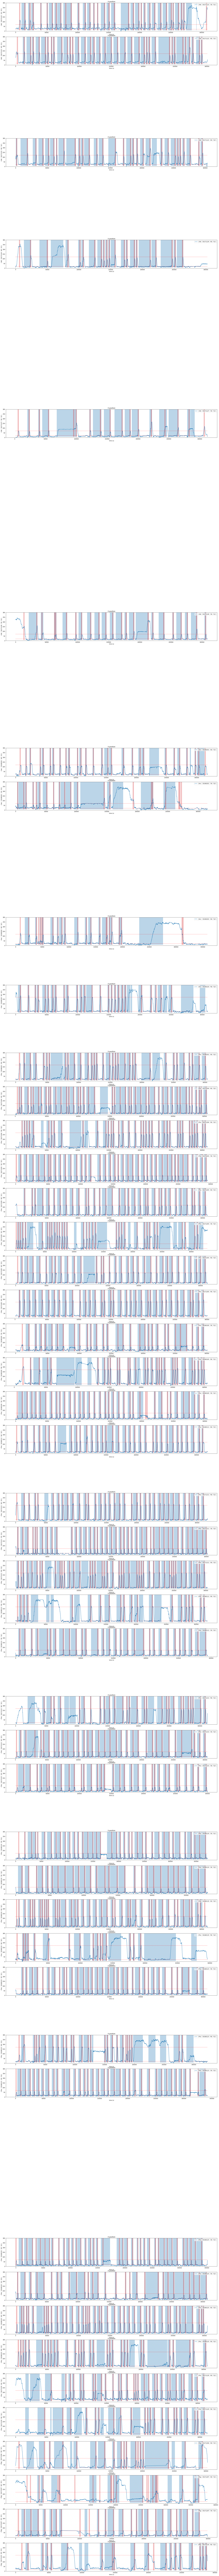

In [11]:
plt.figure(figsize=(30,n_figs*5))


delta_t = 1500

dist_data = {}
dist_rec_field = {}

turn_dist_data = {}
turn_dist_rec_field = {}

speed_data = {}
speed_rec_field = {}

total_dist_data = []
total_turn_dist_data = []
total_speed_data = []

neurons = {}
segments = {}
p_index = {}
turn_times = {}

for i, fname in enumerate(f_list):
    
    
    if fname in valid_trials:

        with open(path+fname+'.json') as f:
            print('loading', fname)
            data = json.load(f)

        fname = session_keys(fname)

        data = edict(data)  

        
        segments[fname] = data.Segments

        neurons[fname] = [k for k in data.keys() if 'Neuron' in k]
        neurons[fname].sort()

        plt.subplot(len(f_list),1,i+1)

        for s in data.Segments:
            plt.fill_between([s[0], s[1]], [10, 10], [300, 300], color='tab:blue', alpha = .3) 

        turn_indices, speed_signal = calc_turn_indices(data.XPositionAligned)
        times = np.array(data.PositionTimestamps)[turn_indices]
        turn_times[fname] = times
        
        
        for t in times:
            plt.fill_between([t-delta_t, t], [10, 10], [300, 300], color='tab:red', alpha = .3) 

        plt.plot(data.PositionTimestamps, data.XPositionAligned, label=fname)

        plt.plot((data.PositionTimestamps[0], data.PositionTimestamps[-1]),
                 (20, 20),'r:')
        if '90' in fname: 
            plt.plot((data.PositionTimestamps[0], data.PositionTimestamps[-1]),
                     (170, 170),'r:')
        elif '60' in fname:
            plt.plot((data.PositionTimestamps[0], data.PositionTimestamps[-1]),
                     (120, 120),'r:')
        else:
            plt.plot((data.PositionTimestamps[0], data.PositionTimestamps[-1]),
                     (70, 70),'r:')

        plt.title('X position')
        plt.xlabel('time (s)')
        plt.ylim((0,300))
        plt.ylabel(fname)
        plt.legend()
        
        dist_data[fname] = {}
        turn_dist_data[fname] = {}
        speed_data[fname] = {}
        
        dist_rec_field[fname] = {}
        turn_dist_rec_field[fname] = {}
        speed_rec_field[fname] = {}
        
        for condition in ('inbound', 'outbound'):
            dist_data[fname][condition] = []
            turn_dist_data[fname][condition] = []
            speed_data[fname][condition] = []

            p_index[fname] = []
            for t in times:
                try:
                    i_turn = np.min(np.where(np.array(data.PositionTimestamps)>=t))
                    i_min = np.max(np.where(np.array(data.PositionTimestamps)<=t-delta_t))
                    i_max = np.min(np.where(np.array(data.PositionTimestamps)>=t+delta_t))
                    if condition == 'outbound':
                        p_index_min, p_index_max = i_min, i_turn
                    else:
                        p_index_min, p_index_max = i_turn, i_max           
                    #p_index[fname].append([p_index_min, p_index_max])
                    dist_data[fname][condition].extend(data.XPositionAligned[p_index_min:p_index_max])
                    #total_dist_data.extend(data.XPositionAligned[p_index_min:p_index_max])
                    turn_dist = data.XPositionAligned[i_turn] - np.array(data.XPositionAligned[p_index_min:p_index_max])
                    turn_dist_data[fname][condition].extend(list(turn_dist))
                    #total_turn_dist_data.extend(list(turn_dist))
                    speed_data[fname][condition].extend(speed_signal[p_index_min:p_index_max])
                    total_speed_data.extend(speed_signal[p_index_min:p_index_max])
                except:
                    pass

        

            dist_rec_field[fname][condition] = {}
            turn_dist_rec_field[fname][condition] = {}
            speed_rec_field[fname][condition] = {}

            for _, t in enumerate(turn_times[fname]):
                i_turn = np.min(np.where(np.array(data.PositionTimestamps)>=t))
                turn_pos = data.XPositionAligned[i_turn]
                for j, neuron in enumerate(neurons[fname]):
                    neuron_data = np.array(data[neuron])
                    try:
                        if condition == 'outbound':
                            i_spike_min =  np.min(np.where(neuron_data > t - delta_t))
                            i_spike_max =  np.max(np.where(neuron_data < t))
                        else:
                            i_spike_min =  np.min(np.where(neuron_data > t))
                            i_spike_max =  np.max(np.where(neuron_data < t + delta_t))
                        spikes = neuron_data[i_spike_min:i_spike_max]
                        l_spikes = len(spikes)

                        for spike in spikes:
                            p_index_min = np.max(np.where(np.array(data.PositionTimestamps)<=spike))
                            p_index_max = np.min(np.where(np.array(data.PositionTimestamps)>=spike))
                            pos_min = data.XPositionAligned[p_index_min]
                            pos_max = data.XPositionAligned[p_index_max]
                            t_min = data.PositionTimestamps[p_index_min]
                            t_max = data.PositionTimestamps[p_index_max]
                            w = (spike - t_min) / (t_max - t_min)
                            pos = w * pos_min + (1-w) * pos_max
                            speed = speed_signal[p_index_min]
                            #print(pos_min, pos, pos_max)
                            if neuron in dist_rec_field[fname][condition]:
                                dist_rec_field[fname][condition][neuron].append(pos)
                                speed_rec_field[fname][condition][neuron].append(speed)
                                turn_dist_rec_field[fname][condition][neuron].append(turn_pos - pos)
                            else: 
                                dist_rec_field[fname][condition][neuron]=[pos]
                                speed_rec_field[fname][condition][neuron]=[speed]
                                turn_dist_rec_field[fname][condition][neuron]=[turn_pos - pos]
                    except:
                        pass    



In [12]:
f_list = list(dist_rec_field.keys())
f_list.sort()
f_list

[('Alt', '20171122', '30', 'S1'),
 ('Alt', '20171122', '60', 'S1'),
 ('Alt', '20171122', '60', 'S2'),
 ('Alt', '20171124', '60', 'S1'),
 ('Alt', '20171127', '30', 'S1'),
 ('Alt', '20171128', '30', 'S1'),
 ('Arc', '20180201', '30', 'S2'),
 ('Arc', '20180201', '60', 'S1'),
 ('Arc', '20180202', '60', 'S2'),
 ('Arc', '20180220', '90', 'S2'),
 ('Pro', '20171129', '60', 'S1'),
 ('Pro', '20171129', '90', 'S1'),
 ('Pro', '20171204', '60', 'S2'),
 ('Pro', '20171204', '90', 'S2'),
 ('Pro', '20171205', '30', 'S1'),
 ('Pro', '20171205', '30', 'S2'),
 ('Pro', '20171205', '60', 'S1'),
 ('Pro', '20171205', '60', 'S2'),
 ('Pro', '20171205', '90', 'S2'),
 ('Pro', '20171211', '30', 'S2'),
 ('Pro', '20171211', '90', 'S1'),
 ('Pro', '20171211', '90', 'S2'),
 ('Pro', '20171213', '30', 'S2'),
 ('Pro', '20171213', '90', 'S1'),
 ('Pro', '20171215', '30', 'S2'),
 ('Pro', '20180109', '30', 'S1'),
 ('Pro', '20180109', '30', 'S2'),
 ('Pro', '20180109', '90', 'S1'),
 ('Pro', '20180111', '60', 'S1'),
 ('Pro', '2018

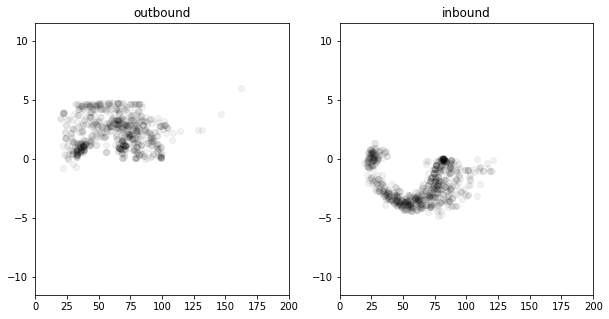

In [13]:
plt.figure(figsize=(10,5))
for i, condition in enumerate(('outbound','inbound')):
    ax = plt.subplot(1,2,i+1)
    for fname in f_list[:1]:
        #print(fname, neurons[fname])
        for i, neuron in enumerate(neurons[fname]):
            try:
                ax.scatter(dist_rec_field[fname][condition][neuron], speed_rec_field[fname][condition][neuron], color='k', alpha=.05)
                
            except:
                pass
    ax.set_xlim(0,200)
    ax.set_ylim(-11.5, 11.5)
    ax.set_title(condition)


In [14]:
dist_rec_field[fname][condition]

{'Neuron_1_1': [110.71864030033503,
  112.98194031660653,
  101.76866833226575,
  101.26589852222406,
  95.40244195167057,
  95.66264957482223,
  88.87387312614973,
  85.78862096017156,
  86.21226254506287,
  87.08244525997472,
  76.74621511132247,
  65.11362001859689,
  53.56048650598481,
  33.05905729594401,
  101.09645061913429,
  101.06647838863512,
  85.41601956690104,
  77.60155413799399,
  69.90726286470513,
  105.72972786529157,
  95.90136741576354,
  91.22663479944738,
  88.88459888209735,
  89.03833927258044,
  80.5854005889704,
  82.17525589717488,
  83.87867229882296,
  85.92277198080123,
  79.09119484918605,
  77.46327201285159,
  71.4777021677018,
  72.39565433970112,
  55.67586089687758,
  88.12366998240763,
  69.02800877921815,
  69.6728147213919,
  61.782286854260825,
  59.32962030195894,
  59.565076290979825,
  59.872477165535045,
  61.291753543800446,
  57.49093540417969,
  57.73863742966272,
  47.038509262036904,
  44.595087028245,
  72.12300800893931,
  66.01805961

In [15]:
import pickle 

In [16]:
if True:
    data = {}
    data['dist_data'] = dist_data
    data['dist_rec_field'] = dist_rec_field
    data['turn_dist_data'] = turn_dist_data
    data['turn_dist_rec_field'] = turn_dist_rec_field
    data['speed_data'] = speed_data
    data['speed_rec_field'] = speed_rec_field
    data['neurons'] = neurons


    with open(f'20230203_data.pkl', 'wb') as f:
        pickle.dump(data,f)


## Distance distribution

In [17]:
f_list

[('Alt', '20171122', '30', 'S1'),
 ('Alt', '20171122', '60', 'S1'),
 ('Alt', '20171122', '60', 'S2'),
 ('Alt', '20171124', '60', 'S1'),
 ('Alt', '20171127', '30', 'S1'),
 ('Alt', '20171128', '30', 'S1'),
 ('Arc', '20180201', '30', 'S2'),
 ('Arc', '20180201', '60', 'S1'),
 ('Arc', '20180202', '60', 'S2'),
 ('Arc', '20180220', '90', 'S2'),
 ('Pro', '20171129', '60', 'S1'),
 ('Pro', '20171129', '90', 'S1'),
 ('Pro', '20171204', '60', 'S2'),
 ('Pro', '20171204', '90', 'S2'),
 ('Pro', '20171205', '30', 'S1'),
 ('Pro', '20171205', '30', 'S2'),
 ('Pro', '20171205', '60', 'S1'),
 ('Pro', '20171205', '60', 'S2'),
 ('Pro', '20171205', '90', 'S2'),
 ('Pro', '20171211', '30', 'S2'),
 ('Pro', '20171211', '90', 'S1'),
 ('Pro', '20171211', '90', 'S2'),
 ('Pro', '20171213', '30', 'S2'),
 ('Pro', '20171213', '90', 'S1'),
 ('Pro', '20171215', '30', 'S2'),
 ('Pro', '20180109', '30', 'S1'),
 ('Pro', '20180109', '30', 'S2'),
 ('Pro', '20180109', '90', 'S1'),
 ('Pro', '20180111', '60', 'S1'),
 ('Pro', '2018

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


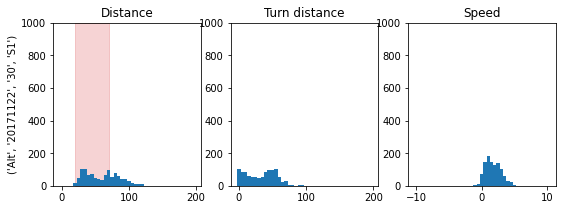

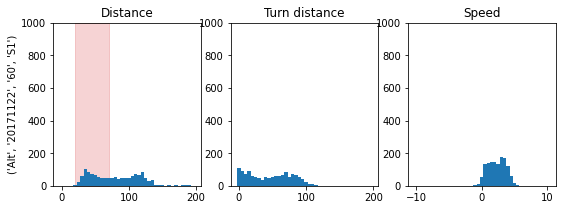

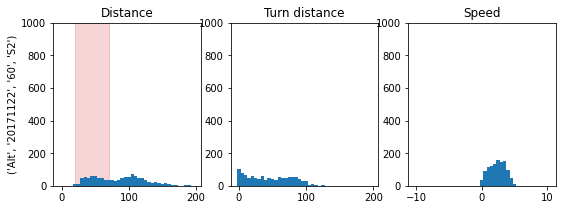

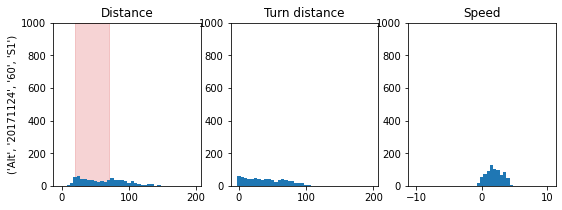

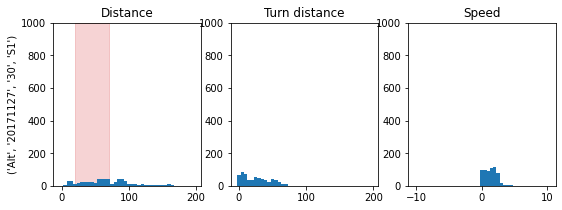

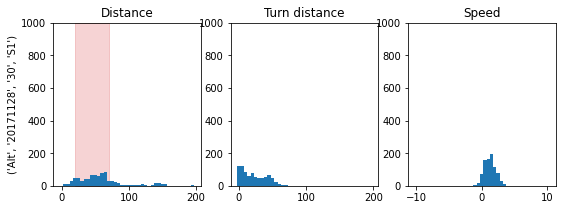

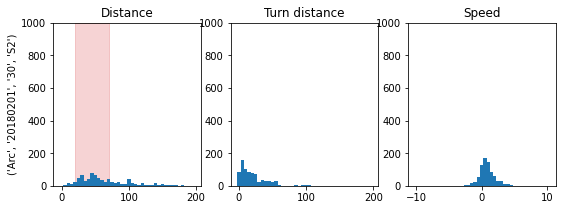

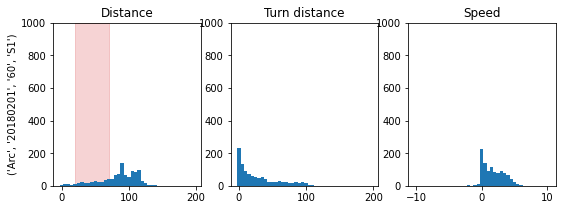

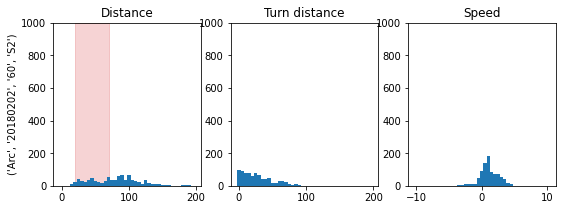

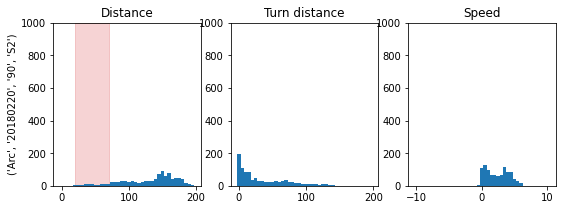

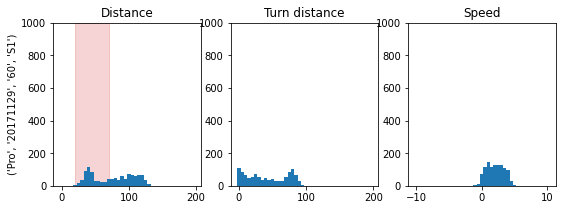

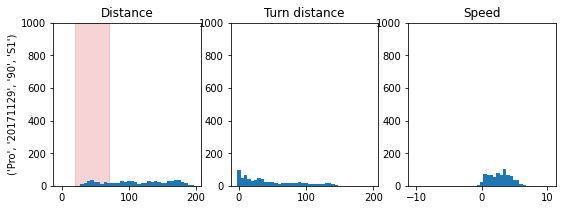

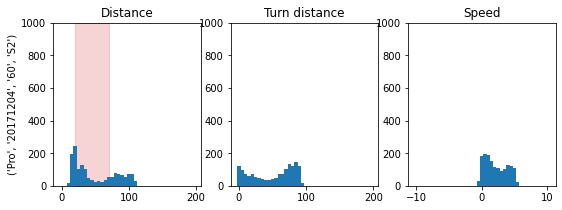

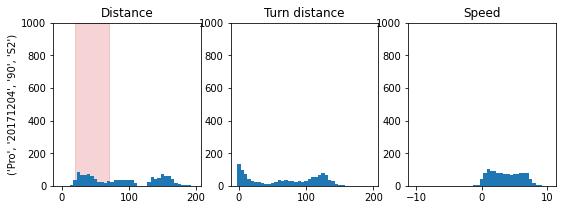

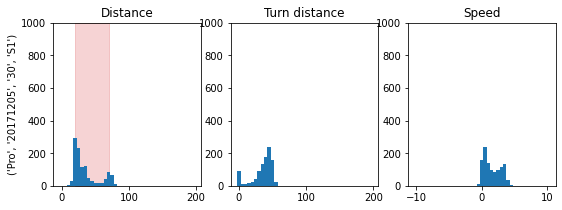

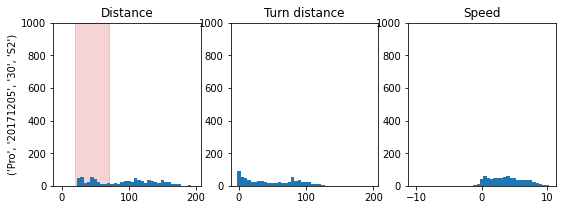

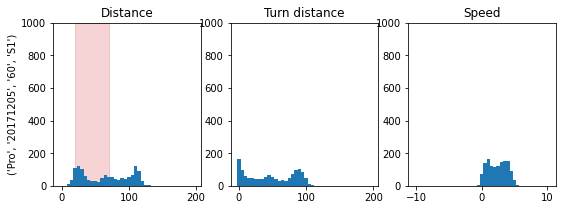

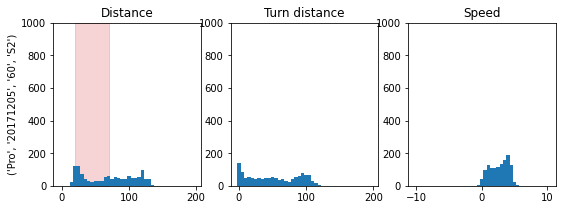

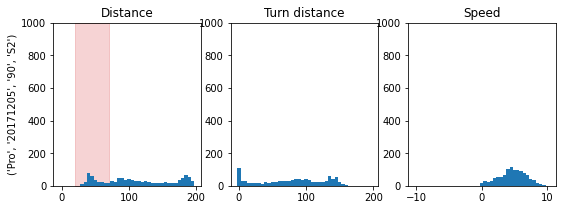

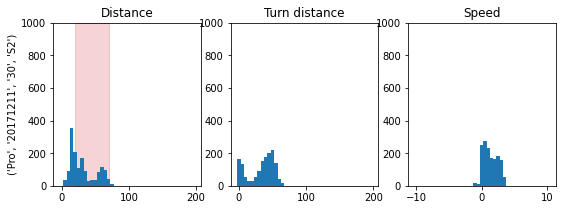

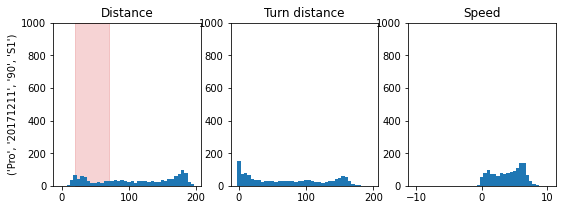

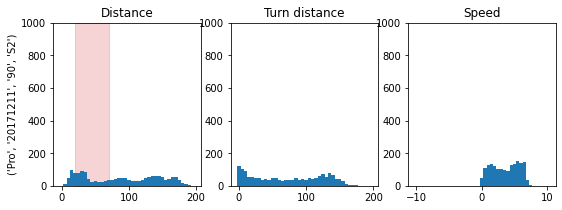

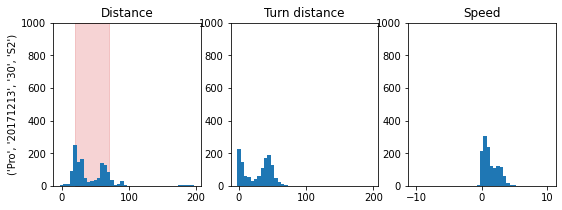

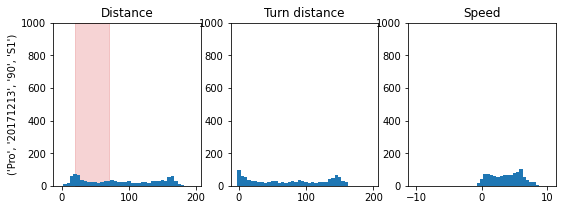

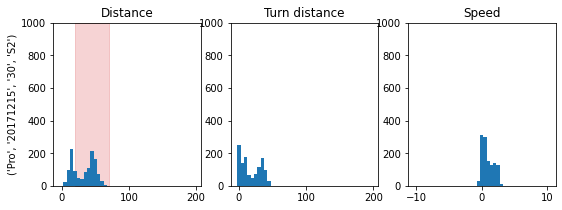

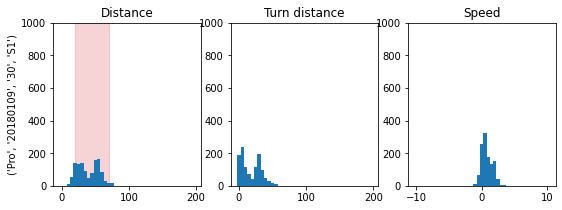

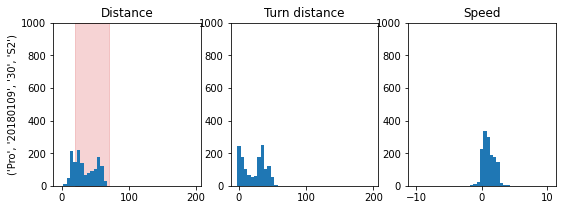

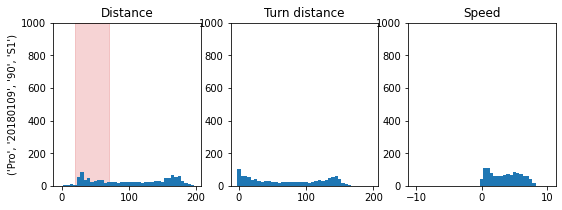

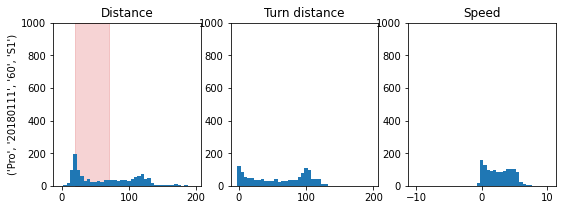

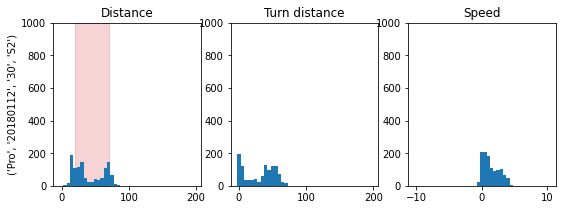

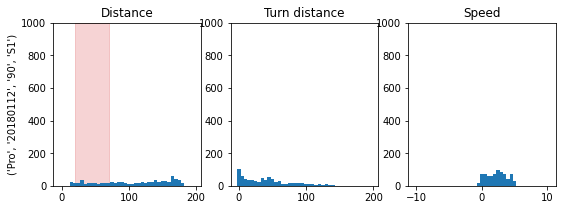

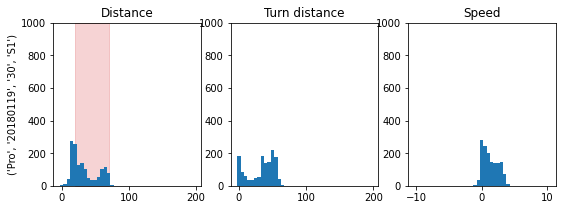

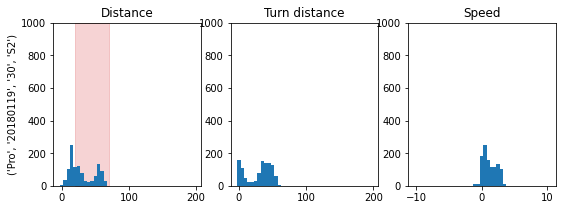

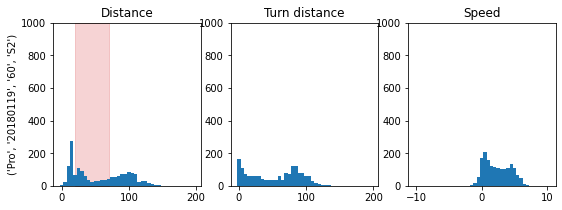

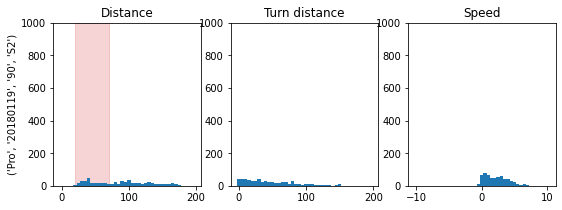

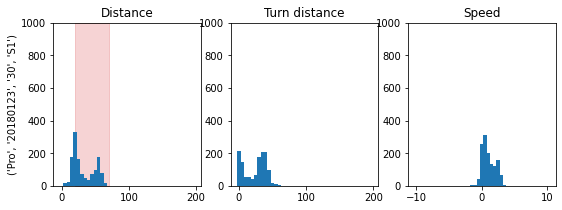

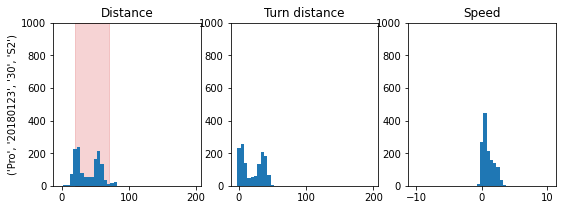

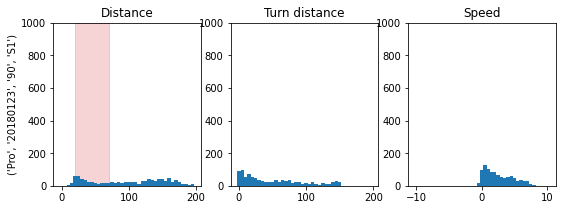

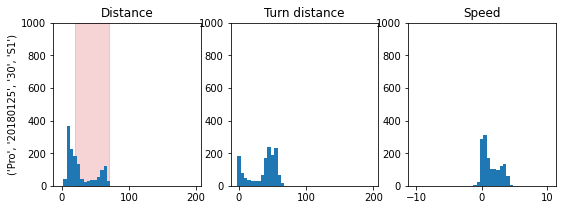

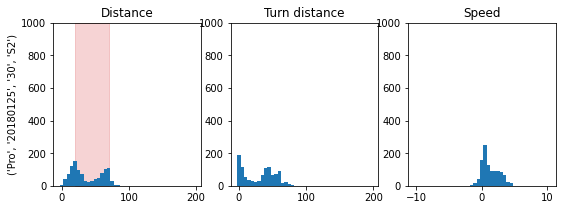

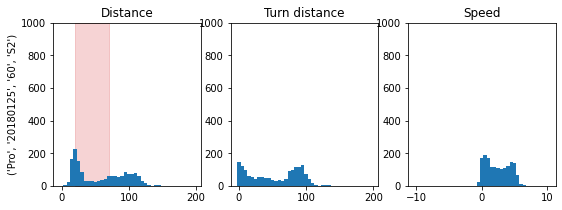

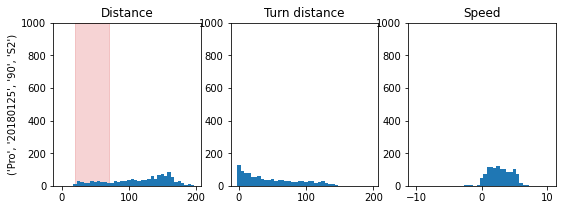

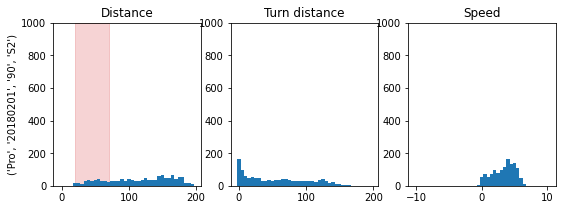

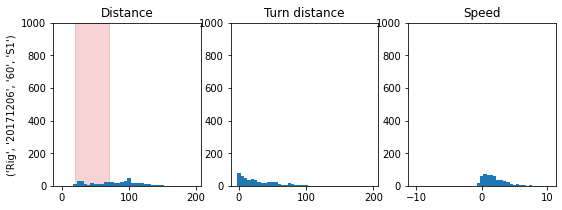

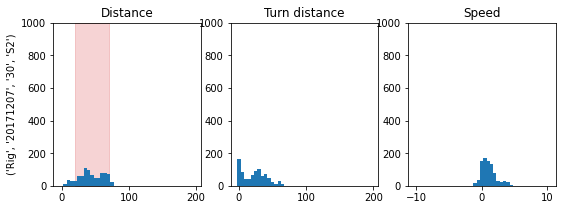

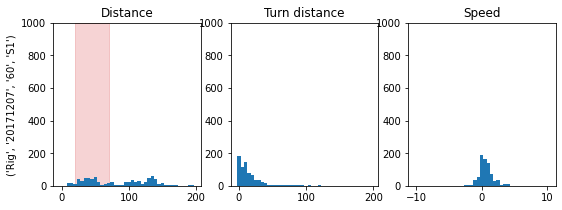

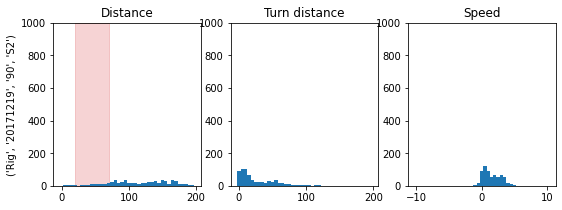

In [23]:
dist_hist = {}
speed_hist = {}
turn_dist_hist = {}

dist_min = 0
dist_max = 195
dist_n_bins = 40
dist_bin_interval = (dist_max - dist_min) / (dist_n_bins-1)
h_dist_min = dist_min - dist_bin_interval/2
h_dist_max = dist_max + dist_bin_interval/2

speed_min = -10
speed_max = 10
speed_n_bins = 41
speed_bin_interval =  (speed_max - speed_min) / (speed_n_bins-1)
h_speed_min = speed_min - speed_bin_interval/2
h_speed_max = speed_max + speed_bin_interval/2 

condition = 'outbound'
for fname in f_list:
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    if '_90' in fname:
        plt.fill_between([20, 170], [0, 0], [1000, 1000], color='tab:red', alpha = .2)  
    elif '_60' in fname:
        plt.fill_between([20, 120], [0, 0], [1000, 1000], color='tab:red', alpha = .2)  
    else:
        plt.fill_between([20, 70], [0, 0], [1000, 1000], color='tab:red', alpha = .2)  
    dist_hist[fname] = plt.hist(dist_data[fname][condition], dist_n_bins, range=(h_dist_min,h_dist_max))
    plt.ylabel(fname)
    plt.ylim(0,1000)
    plt.title('Distance')
    plt.subplot(1,3,2)
    turn_dist_hist[fname] = plt.hist(turn_dist_data[fname][condition], dist_n_bins, range=(h_dist_min,h_dist_max))
    plt.ylim(0,1000)
    plt.title('Turn distance')
    plt.subplot(1,3,3)
    speed_hist[fname] = plt.hist(speed_data[fname][condition], speed_n_bins, range=(h_speed_min,h_speed_max))
    plt.ylim(0,1000)
    plt.title('Speed')

In [ ]:
# speed x theta slope varie en fonction de la tache (30, 60, 90) ==> indice de difficulté, "engagement" 
# IMPORTANT : identifier le profil de la theta frequency au cours d'une trajectoire??? temps trop court

In [ ]:
# tolerance : target +/- 5 cm
# vitesse plus faible à 30 cm, plateau à 60 - 90 cm

In [ ]:
# theta (4-12) / gamma (25 -50 | 50-90) = nested? 

In [ ]:
# idee : recrutement de plus de cellules à l'aller? (plus de cellules sont impliques dans l'estimation de la distance)
# idee : extinction active au retour?

In [ ]:
# but = "lieu" / celules de "but"?